In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

##Import any other packages you may need here

EDA is open-ended, and it is up to you to decide how to look at different ways to slice and dice your data. A good starting point is to look at the requirements for the FDA documentation in the final part of this project to guide (some) of the analyses you do. 

This EDA should also help to inform you of how pneumonia looks in the wild. E.g. what other types of diseases it's commonly found with, how often it is found, what ages it affects, etc. 

Note that this NIH dataset was not specifically acquired for pneumonia. So, while this is a representation of 'pneumonia in the wild,' the prevalence of pneumonia may be different if you were to take only chest x-rays that were acquired in an ER setting with suspicion of pneumonia. 

Perform the following EDA:
* The patient demographic data such as gender, age, patient position,etc. (as it is available)
* The x-ray views taken (i.e. view position)
* The number of cases including: 
    * number of pneumonia cases,
    * number of non-pneumonia cases
* The distribution of other diseases that are comorbid with pneumonia
* Number of disease per patient 
* Pixel-level assessments of the imaging data for healthy & disease states of interest (e.g. histograms of intensity values) and compare distributions across diseases.

Note: use full NIH data to perform the first a few EDA items and use `sample_labels.csv` for the pixel-level assassements. 

Also, **describe your findings and how will you set up the model training based on the findings.**

In [2]:
## Below is some helper code to read data for you.
## Load NIH data
## Load 'sample_labels.csv' data for pixel level assessments
sample_df = pd.read_csv('sample_labels.csv')
sample_df.sample(3)
all_xray_df = pd.read_csv('/data/Data_Entry_2017.csv')
all_xray_df.sample(3)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
55535,00013911_004.png,Effusion|Nodule,4,13911,63,M,PA,2992,2991,0.143,0.143,NaN
19488,00005176_013.png,No Finding,13,5176,69,M,PA,2500,2048,0.168,0.168,NaN
71520,00017618_036.png,No Finding,36,17618,36,M,AP,2500,2048,0.168,0.168,NaN


In [3]:
sample_df.shape,all_xray_df.shape

((5606, 11), (112120, 12))

In [4]:
## EDA
# Todo 

# Gender

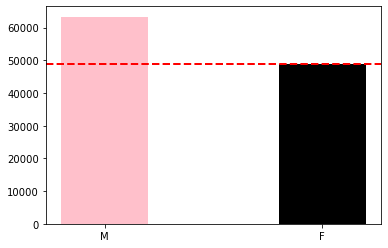

In [5]:
base_line=int(all_xray_df['Patient Gender'][all_xray_df['Patient Gender']=="F"].value_counts())
plt.bar(all_xray_df['Patient Gender'].unique(),
        all_xray_df['Patient Gender'].value_counts(), 
        width=0.4, 
        bottom=None, 
        align='center', 
        color=['pink', 
#                'cornflowerblue',
#                'royalblue', 
#                'midnightblue', 
#                'navy', 
#                'darkblue', 
#                  'mediumblue',
              'black'],
#         orientation='horizontal'
       )
# plt.xticks(rotation='vertical')
plt.axhline(y=base_line, c="r", ls="--", lw=2)
plt.show()

# Follow-up

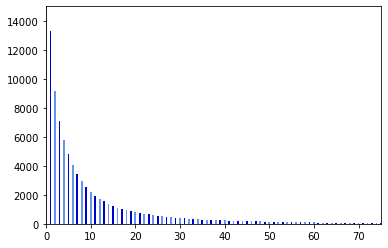

In [10]:
plt.bar(
        all_xray_df['Follow-up #'].unique(),
        all_xray_df['Follow-up #'].value_counts(), 
        width=0.4, 
        bottom=None, 
        align='center', 
#         orientation='vertical',
        color=['cornflowerblue',
#                'royalblue', 
#                'midnightblue', 
#                'navy', 
#                'darkblue', 
               'mediumblue'],
       )
# plt.xticks(rotation='vertical')
# plt.axhline(y=base_line, c="r", ls="--", lw=2)
plt.xlim(0,75)
plt.ylim(0,15000)
plt.show()

# Finding Labels

In [11]:
all_xray_df['Finding_Labels_s']=all_xray_df['Finding Labels'].str.split('|').str.get(-1)
all_xray_df.groupby('Finding_Labels_s').count()['Patient ID'].sort_values(ascending=False)
# all_xray_df['Finding_Labels_s']=all_xray_df['Finding Labels'].str.split('|').str.get(0)
# all_xray_df.groupby('Finding_Labels_s').count()['Patient ID'].sort_values(ascending=False)
# all_xray_df['Finding_Labels_s2']=all_xray_df['Finding Labels'].str.split(',').str.get(0)
# all_xray_df.groupby('Finding_Labels_s2').count()['Patient ID'].sort_values(ascending=False)

Finding_Labels_s
No Finding            60361
Infiltration          15577
Effusion               6497
Nodule                 5535
Pneumothorax           5286
Atelectasis            4229
Mass                   4145
Pleural_Thickening     3043
Consolidation          1758
Pneumonia              1393
Emphysema              1211
Cardiomegaly           1184
Fibrosis                977
Edema                   773
Hernia                  151
Name: Patient ID, dtype: int64

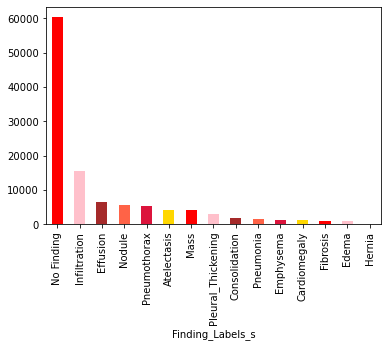

In [12]:
all_xray_df.groupby('Finding_Labels_s').count()['Patient ID'].\
sort_values(ascending=False).plot(kind='bar',\
color=['red','pink','brown','tomato','crimson','gold'])
# plt.xticks(rotation='vertical')

# Age

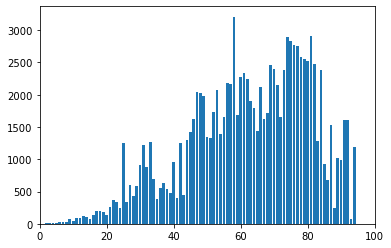

In [82]:
plt.bar(all_xray_df['Patient Age'].unique(),
        all_xray_df['Patient Age'].value_counts(), 
        
#         width=0.4, 
#         bottom=None, 
#         align='center', 
# #         orientation='vertical',
#         color=['cornflowerblue',
#                'royalblue', 
#                'midnightblue', 
#                'navy', 
#                'darkblue', 
#                'mediumblue'],
       )
# plt.xticks(rotation='vertical')
# plt.axhline(y=base_line, c="r", ls="--", lw=2)
plt.xlim(0,100)
# plt.ylim(-0.5,2.5)
plt.show()

# View Position

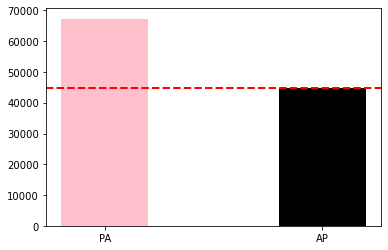

In [150]:
# all_xray_df.groupby('View Position').count()['Patient ID'].sort_values(ascending=False)
base_line=int(all_xray_df['View Position'][all_xray_df['View Position']=="AP"].value_counts())

plt.bar(all_xray_df['View Position'].unique(),
        all_xray_df['View Position'].value_counts(), 
        width=0.4, 
        bottom=None, 
        align='center', 
        color=['pink', 
              'black'],
#         orientation='horizontal'
       )
# plt.xticks(rotation='vertical')
plt.axhline(y=base_line, c="r", ls="--", lw=2)
plt.show()

In [151]:
# all_xray_df.columns